<a href="https://colab.research.google.com/github/fabiolobato/ENIAC23-Jobs/blob/main/An%C3%A1lise_l%C3%A9xico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import string


In [ ]:
#df = pd.read_csv('df_preprocessado.csv')
#df.head(2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PECS/jobs_DS/dados_DS/df_preprocessado.csv', delimiter=',')
df.head(2)

,humanLanguage,id,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,text_result,title_result
0,en,JOB1241441652,"Results for ""Senior Data Scientist Jobs in Uni...",https://www.linkedin.com/jobs/senior-data-scie...,NaN,NaN,"\n3,000+Results for ""Senior Data Scientist Job...",NaN,"\n3,000+Results for ""Senior Data Scientist Job...","Results for ""Senior Data Scientist Jobs in Uni...","3 000+results ""senior data scientist jobs unit...","results ""senior data scientist jobs united sta..."
1,en,JOB4457932128,Data Scientist,https://www.linkedin.com/jobs/view/872319287/,"2+ years of relevant experience preferred.,Hea...",NaN,Equian is looking to hire a Data Scientist to ...,Lead effort to determine overpayments from con...,Equian is looking to hire a Data Scientist to ...,Data Scientist,equian looking hire data scientist join data s...,data scientist


In [ ]:
df = df.loc[df['humanLanguage'] == 'en']

In [ ]:
len(df)

5709

In [ ]:
#normalização de termos
df['text_result'] = df['text_result'].str.replace('c\+\+', 'c_plus_plus')
df['text_result'] = df['text_result'].str.replace('c\#', 'c_sharp')
df['text_result'] = df['text_result'].str.replace('ai', 'artificial intelligence')
df['text_result'] = df['text_result'].str.replace('ml', 'machine learning')
df['text_result'] = df['text_result'].str.replace('nlp', 'natural language processing')
df['text_result'] = df['text_result'].str.replace('ms', 'masters degree')
df['text_result'] = df['text_result'].str.replace('phd', 'postdoctoral')
df['text_result'] = df['text_result'].str.replace('aws', 'amazon web services')
df['text_result'] = df['text_result'].str.replace('gcp', 'google cloud  platform')
df['text_result'] = df['text_result'].str.replace('bigquery', 'google bigquery')
df['text_result'] = df['text_result'].str.replace('google cloud', 'google cloud platform')
df['text_result'] = df['text_result'].str.replace('word', 'microsoft word')
df['text_result'] = df['text_result'].str.replace('excel', 'microsoft excel')
df['text_result'] = df['text_result'].str.replace('etl', 'extraction transformation loading')

<ipython-input-6-2c03e2d6c3fe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_result'] = df['text_result'].str.replace('c\+\+', 'c_plus_plus')
<ipython-input-6-2c03e2d6c3fe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_result'] = df['text_result'].str.replace('c\#', 'c_sharp')


In [ ]:
# Defina o dicionário
dicionario_tx = {
    "tecnologias": ["ansible", "apache spark", "bokeh", "caret","cassandra", "corenlp", "docker", "dplyr", "emr", "fortran", "gensim", "ggplot2",
                    "gradle", "hadoop", "hadoop", "hbase", "hive","impala", "kubernetes", "mapreduce", "mapreduce", "matlab", "maven","nextflow", "nltk",
                    "numpy", "openmp", "pandas","pig", "puppet", "pyspark", "pytorch", "rancher", "sas", "scala", "scikit learn", "scipy", "spacy",
                    "spark", "tensorflow ", "tez", "weka","powerbi","tableau","looker","data studio","qlik","streamlit","shiny","plotly dash","matplotlib","seaborn",
                    "powerpoint","microsoft excel","microsoft word","google sheets","git","gitlab","github","dvc","neptune","linux","jupyterlab"," anaconda",
                    "jupyter","google colab","mysql","oracle","sql serve","cassandra","mongodb","mariadb","datomic","postgresql","sqlite","google bigquery",
                    "couch db","sql","nosql","azure","amazon web services","google cloud platform"],

    "skills": ["ability compute cluster", "analyze large scale", "analyzing data sets", "bioinformatics analysis",
               "bioinformatics analysis pipelines", "biological data analysis", "collaborative development tools",
               "common bioinformatics algorithms", "communication skills", "compound screening", "computational programming",
               "creating web applications", "data analysis", "data visualization skills", "database programming", "fluency english",
               "gather requirements", "genome alignment software", "good communication skills english", "high level programming languages",
               "highly motivated", "initiative", "innovative", "interactive", "interpersonal skills", "mining data from public databases",
               "multidisciplinary team", "multitask", "omics analysis", "productive", "programming skills ", "programming techniques", "scientific skills",
               "software development activities", "statistical analysis", "statistical computing", "strong background programming algorithms",
               "strong communication", "strong computational skills", "team player", "web programming", "work independently", "work multiple simult", ],

    "conhecimentos": ["storytelling","applied math", "artificial intelligence", "bioinformatics", "biostatistics",
                      "biostatistics", "biotechnology", "business strategy", "clustering", "computational biology",
                      "computer science", "computer vision", "data manipulation", "data mining", "data pipelines",
                      "data science", "data visualization", "deep learning", "dimensionality reduction", "electrical engineering",
                      "engineering", "life sciences", "linear/non-linear regression models", "machine learning", "mathematics",
                      "modeling algorithms", "natural language processing", "neuroscience", "oncology", "pca", "physics",
                      "statistic modeling", "statistical analysis", "statistics","time series models","extraction transformation loading",
                      "predictive analytics","business intelligence","financial analysis","data management","data governance",
                      "statistical testin","image science","bayesian statistics","inferential analyses","segmentation","chemistry",
                      "linear algebra","calculus"],

    "requisitos": ["bachelors degree", "doctorate degree", "experience data scientist",
                   "fluent english", "masters degree", "ms", "phd", "postdoctoral", "university degree",
                   "experience working unix", "experience computational", "development experience","mba","experience data analytics"],

    "linguagens": ["julia","asp", "c", "c_sharp", "c_plus_plus", "fortran", "golang", "java",
                   "javascript", "perl", "php", "python", "r", "ruby", "rust", "vb"],
}

In [ ]:
#criando dicionário vazio
dataframes_por_categoria_tx = {}

for categoria, palavras in dicionario_tx.items():
    ocorrencias = {}
    for palavra in palavras:
        padrao = r'\b{}\b'.format(palavra)  # Encontrar palavras completas
        ocorrencias[palavra] = df['text_result'].apply(lambda x: 1 if re.search(padrao, str(x)) else 0).sum()

    df_ocorrencias = pd.DataFrame({'contagem': list(ocorrencias.values())})
    df_ocorrencias['termos'] = list(ocorrencias.keys())

    df_ocorrencias = df_ocorrencias.sort_values('contagem', ascending=False)

    dataframes_por_categoria_tx[categoria] = df_ocorrencias



In [ ]:
df_tecnologias = dataframes_por_categoria_tx['tecnologias']
df_linguagens = dataframes_por_categoria_tx['linguagens']
df_skills = dataframes_por_categoria_tx['skills']
df_conhecimentos = dataframes_por_categoria_tx['conhecimentos']
df_requisitos = dataframes_por_categoria_tx['requisitos']
#df_nivel = dataframes_por_categoria_tx['nivel']


### Tecnologias Geral

In [ ]:
df_tecnologias = df_tecnologias[df_tecnologias['contagem'] != 0]
df_tecnologias

,contagem,termos
74,1735,sql
13,906,hadoop
36,858,spark
31,666,sas
41,452,tableau
...,...,...
21,1,nextflow
73,1,couch db
30,1,rancher
57,1,dvc


<ipython-input-29-aef918ce2722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()


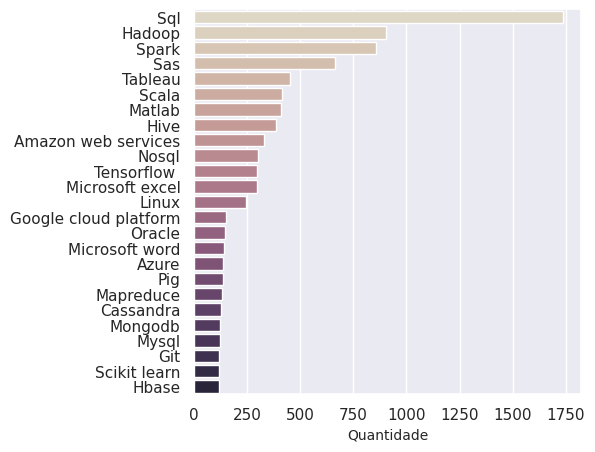

In [ ]:
barras_qtd = 25
df_top = df_tecnologias.head(barras_qtd)

df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()

sns.set()
custom_palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=barras_qtd)
plt.figure(figsize=(5,5))
sns.barplot(x='contagem', y='termos', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize = 10)
plt.ylabel('')  # Oculta a legenda lateral

plt.savefig('tecnologias1.png', format='png',
            bbox_inches ="tight")

### Linguagens de programação

In [ ]:
df_linguagens = df_linguagens[df_linguagens['contagem'] != 0]
df_linguagens

,contagem,termos
11,2676,python
12,2332,r
7,762,java
4,400,c_plus_plus
2,339,c
9,125,perl
3,100,c_sharp
8,96,javascript
13,65,ruby
0,35,julia


In [ ]:
df_linguagens['termos'] = df_linguagens['termos'].str.replace('c_plus_plus', 'c++').str.replace('c_sharp', 'c#')

df_linguagens.head(10)

,contagem,termos
11,2676,python
12,2332,r
7,762,java
4,400,c++
2,339,c
9,125,perl
3,100,c#
8,96,javascript
13,65,ruby
0,35,julia


<ipython-input-22-212cf5de3420>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()


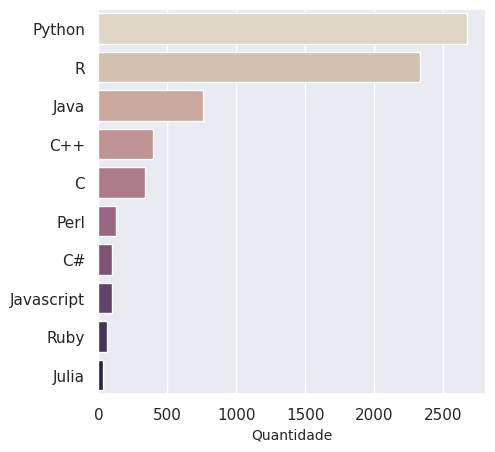

In [ ]:
barras_qtd = 10
df_top = df_linguagens.head(barras_qtd)

df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()

sns.set()
custom_palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=barras_qtd)
plt.figure(figsize=(5,5))
sns.barplot(x='contagem', y='termos', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize = 10)
plt.ylabel('')  # Oculta a legenda lateral

plt.savefig('ling_prog1.png', format='png',
            bbox_inches ="tight")

### Conhecimento

In [ ]:
df_conhecimentos = df_conhecimentos[df_conhecimentos['contagem'] != 0]
df_conhecimentos

,contagem,termos
22,3244,machine learning
14,2645,data science
32,2578,statistics
19,1892,engineering
9,1832,computer science
23,1386,mathematics
12,1115,data mining
2,781,artificial intelligence
31,716,statistical analysis
25,587,natural language processing


<ipython-input-20-0e8ffde1e9eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()


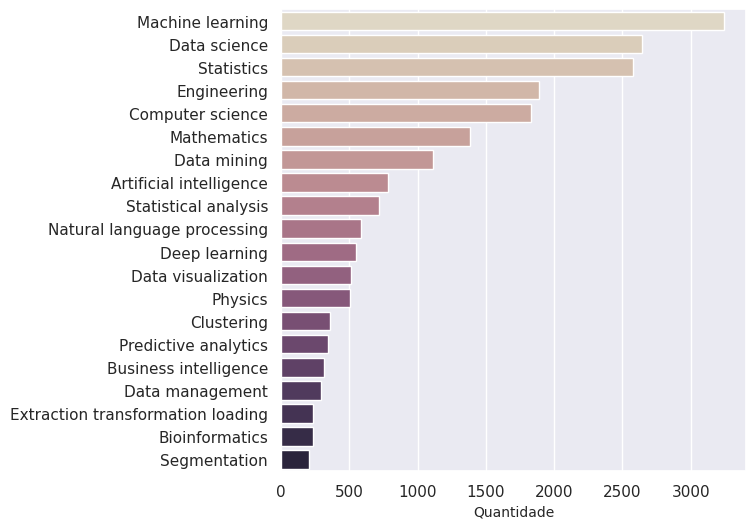

In [ ]:
barras_qtd = 20
df_top = df_conhecimentos.head(barras_qtd)

df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()

sns.set()
custom_palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=barras_qtd)
plt.figure(figsize=(6,6))
sns.barplot(x='contagem', y='termos', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize = 10)
plt.ylabel('')  # Oculta a legenda lateral


plt.savefig('conhecimento1.png', format='png',
            bbox_inches ="tight")

### Requisitos

In [ ]:
df_requisitos = df_requisitos[df_requisitos['contagem'] != 0]
df_requisitos

,contagem,termos
7,957,postdoctoral
4,785,masters degree
0,298,bachelors degree
11,133,development experience
2,126,experience data scientist
13,57,experience data analytics
12,42,mba
8,29,university degree
3,25,fluent english
1,14,doctorate degree


<ipython-input-11-29d25b1116ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()


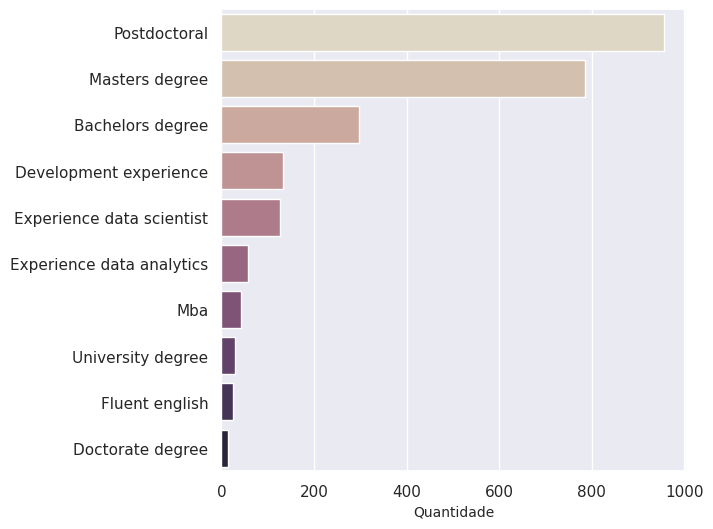

In [ ]:
barras_qtd = 10
df_top = df_requisitos.head(barras_qtd)

df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()

sns.set()
custom_palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=barras_qtd)
plt.figure(figsize=(6,6))
sns.barplot(x='contagem', y='termos', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize = 10)
plt.ylabel('')  # Oculta a legenda lateral

plt.savefig('requisitos.png', format='png',
            bbox_inches ="tight")

##Habilidades

In [ ]:
df_skills = df_skills[df_skills['contagem'] != 0]
df_skills

,contagem,termos
22,1267,innovative
12,1140,data analysis
8,1070,communication skills
34,716,statistical analysis
30,332,programming skills
23,303,interactive
21,222,initiative
41,190,work independently
24,185,interpersonal skills
37,177,strong communication


<ipython-input-25-c31cf9de258c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()


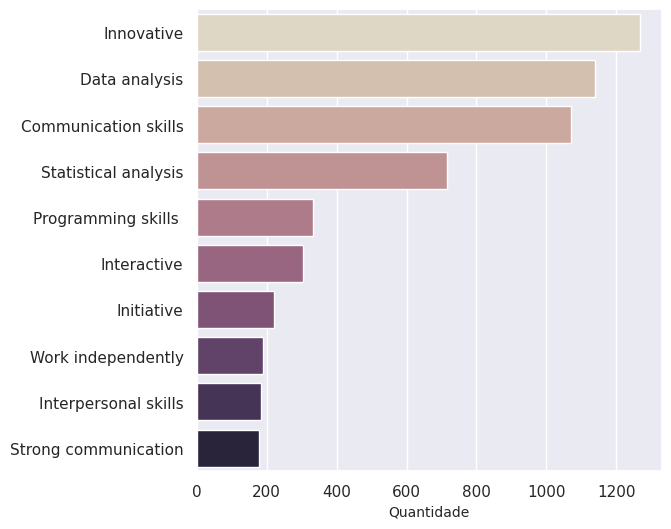

In [ ]:
barras_qtd = 10
df_top = df_skills.head(barras_qtd)

df_top.loc[:, 'termos'] = df_top['termos'].str.capitalize()

sns.set()
custom_palette = sns.color_palette("ch:s=-.2,r=.6", n_colors=barras_qtd)
plt.figure(figsize=(6,6))
sns.barplot(x='contagem', y='termos', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize = 10)
plt.ylabel('')  # Oculta a legenda lateral


plt.savefig('skills.png', format='png',
            bbox_inches ="tight")